In [1]:
from macsort.factory import SortingFactory
from macsort.interface import SortAlgorithm, SortResult

# Demonstrating different sort algorithms

In [2]:
factory = SortingFactory()

## Generating random arrays

In [3]:
import random
random.seed(1659644754) # For reproducibility purposes

In [4]:
dataset = {
    "10":    random.sample(range(10), 10),
    "50":    random.sample(range(50), 50),
    "100":   random.sample(range(100), 100),
    "250":   random.sample(range(250), 250),
    "500":   random.sample(range(500), 500),
    "750":   random.sample(range(750), 750),
    "1000":  random.sample(range(1000), 1000),
    "2500":  random.sample(range(2500), 2500),
    "5000":  random.sample(range(5000), 5000),
}

We define a `multi_sort` function to execute the algorithm on each and every array, and collect the number of comparison operations done during the sorting process (as a comparison benchmark)

In [5]:
def multi_sort(algo: SortAlgorithm, dataset: dict) -> dict:
    result = {}
    for k in dataset.keys():
        result[k] = algo(dataset[k])['ops']
    return result

## Bubble Sort algorithm - $\mathcal{O}(n^2)$

In [6]:
bubble = factory.build("bubble")

In [7]:
bubble(dataset['10'])

{'sorted': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'ops': 42}

In [8]:
bubble_results = multi_sort(bubble, dataset)
bubble_results

{'10': 42,
 '50': 1224,
 '100': 4814,
 '250': 31047,
 '500': 124120,
 '750': 280497,
 '1000': 497289,
 '2500': 3119564,
 '5000': 12496639}

## Insertion Sort algorithm - $\mathcal{O}(n^2)$

In [9]:
insert = factory.build('insertion')

In [10]:
insert(dataset['10'])

{'sorted': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'ops': 21}

In [11]:
insert_results = multi_sort(insert, dataset)
insert_results

{'10': 21,
 '50': 602,
 '100': 2490,
 '250': 15715,
 '500': 61792,
 '750': 140549,
 '1000': 236420,
 '2500': 1550471,
 '5000': 6276581}

## Merge Sort algorithm - $\mathcal{O}(n.\log(n))$

In [12]:
merge = factory.build('merge')

In [13]:
merge(dataset['10'])

{'sorted': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'ops': 82}

In [14]:
merge_results = multi_sort(merge, dataset)
merge_results

{'10': 82,
 '50': 861,
 '100': 2130,
 '250': 6547,
 '500': 15134,
 '750': 24608,
 '1000': 34424,
 '2500': 99429,
 '5000': 218566}

## Quick Sort algorithm - $\mathcal{O}(n.\log(n))$

In [15]:
quick = factory.build('quick')

In [16]:
quick(dataset['10'])

{'sorted': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'ops': 38}

In [17]:
quick_results = multi_sort(quick, dataset)
quick_results

{'10': 38,
 '50': 319,
 '100': 854,
 '250': 2207,
 '500': 5386,
 '750': 8762,
 '1000': 11883,
 '2500': 36428,
 '5000': 76120}

## Radix Sort algorithm - $\mathcal{O}(n)$

In [18]:
radix = factory.build('radix')

In [19]:
radix(dataset['10'])

{'sorted': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'ops': 11}

In [20]:
radix_results = multi_sort(radix, dataset)
radix_results

{'10': 11,
 '50': 102,
 '100': 202,
 '250': 753,
 '500': 1503,
 '750': 2253,
 '1000': 3003,
 '2500': 10004,
 '5000': 20004}

# Comparing sort algorithms

## Drawing results, and extrapolating 
We will use a 1-dimension interpolation algorithm to fill the gap between the measurements, and extrapolate the evolution.

In [21]:
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

In [22]:
def interpolate(result: SortResult):
    """Return a function f such as f(x) = y for known xs and ys, plus (inter|extra)polation"""
    xs = [int(x) for x in result.keys()]
    ys = [y for y in result.values()]
    f = interp1d(xs, ys, kind='linear', fill_value='extrapolate')
    return f

In [23]:
def draw(results: SortResult, title: str, max_range: int, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='array size', ylabel='|operations|')
    # Extracting real measurements
    measured_x = [int(x) for x in results.keys()]
    measured_y = [y for y in results.values()]
    # building interpolation range
    interpol_f = interpolate(results)
    interpol_x = list(range(0, max_range, 10))
    interpol_y = interpol_f(interpol_x)
    # Plotting the measurements as dots (o), and the function as a line (-)
    canvas.plot(measured_x, measured_y, 'o', label="measured")
    canvas.plot(interpol_x, interpol_y, '-', label="interpolation")
    canvas.legend()
    

## Graphing the results

### Comparing $\mathcal{O}(n^2)$ sorts

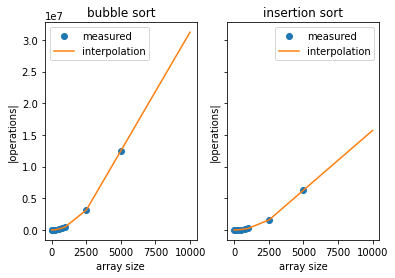

In [24]:
fig, axes = plt.subplots(1,2, sharex = True, sharey = True)
draw(bubble_results, "bubble sort", 10000, axes[0])
draw(insert_results, "insertion sort", 10000, axes[1])
fig.savefig('outputs/sort_comparisons_On2.pdf')

### Comparing $\mathcal{O}(n.\log(n))$ sorts

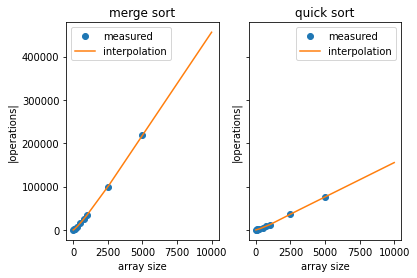

In [25]:
fig, axes = plt.subplots(1,2, sharex = True, sharey = True)
draw(merge_results, "merge sort", 10000, axes[0])
draw(quick_results, "quick sort", 10000, axes[1])
fig.savefig('outputs/sort_comparisons_Onlogn.pdf')

### Comparing all results - Large scale

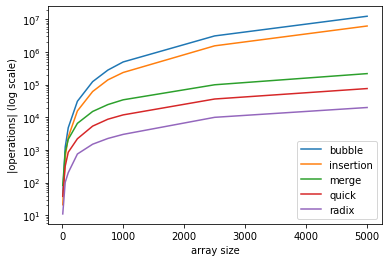

In [26]:
fig, axes = plt.subplots()
axes.set(xlabel='array size', ylabel='|operations| (log scale)')
axes.set_yscale('log')
xs = [int(x) for x in dataset.keys()]
axes.plot(xs, [y for y in bubble_results.values()], '-', label="bubble")
axes.plot(xs, [y for y in insert_results.values()], '-', label="insertion")
axes.plot(xs, [y for y in merge_results.values()],  '-', label="merge")
axes.plot(xs, [y for y in quick_results.values()],  '-', label="quick")
axes.plot(xs, [y for y in radix_results.values()],  '-', label="radix")
axes.legend()
fig.savefig('outputs/sort_comparisons_large.pdf')

### Comparing all results - Small scale

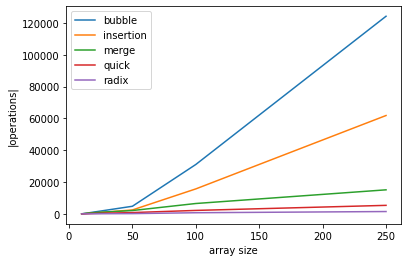

In [27]:
fig, axes = plt.subplots()
scope = [10,20, 50, 100, 250]
axes.set(xlabel='array size', ylabel='|operations|')
axes.plot(scope, [y for y in bubble_results.values()][:len(scope)], '-', label="bubble")
axes.plot(scope, [y for y in insert_results.values()][:len(scope)], '-', label="insertion")
axes.plot(scope, [y for y in merge_results.values()][:len(scope)], '-',  label="merge")
axes.plot(scope, [y for y in quick_results.values()][:len(scope)], '-',  label="quick")
axes.plot(scope, [y for y in radix_results.values()][:len(scope)], '-',  label="radix")
axes.legend()
fig.savefig('outputs/sort_comparisons_small.pdf')

# Benchmarking execution time

## Executing the performance benchmark

We run the benchmark defined in `benchmark.py` with PyPerf. If the result file is already available, we reuse this file instead of recomputing, to save precious time. PyPerf works as an external command, so we use the `!{}` syntax from Jupyter to directly execute shell command. 

In [28]:
from os.path import exists
if not exists('outputs/pyperf_measurements.json'):
    !{'python benchmark.py -o outputs/pyperf_measurements.json'}

.....................
python-sort: Mean +- std dev: 36.7 us +- 2.8 us
.....................
radix: Mean +- std dev: 27.9 ms +- 0.4 ms
.....................
quick: Mean +- std dev: 61.0 ms +- 2.9 ms
.....................
merge: Mean +- std dev: 135 ms +- 2 ms
.....................
insertion: Mean +- std dev: 8.92 sec +- 0.33 sec
.....................
bubble: Mean +- std dev: 19.3 sec +- 0.6 sec


## Plotting the results in text mode

In [29]:
!{'python -m pyperf hist outputs/pyperf_measurements.json'}

python-sort

34.5 us:  3 #####
35.5 us: 37 ###################################################################
36.4 us: 12 ######################
37.3 us:  4 #######
38.2 us:  1 ##
39.1 us:  0 |
40.0 us:  1 ##
40.9 us:  0 |
41.8 us:  0 |
42.7 us:  0 |
43.6 us:  0 |
44.5 us:  0 |
45.5 us:  0 |
46.4 us:  1 ##
47.3 us:  0 |
48.2 us:  0 |
49.1 us:  0 |
50.0 us:  0 |
50.9 us:  0 |
51.8 us:  0 |
52.7 us:  0 |
53.6 us:  1 ##

radix
=====

27.1 ms: 1 ########
27.2 ms: 1 ########
27.3 ms: 2 ###############
27.4 ms: 3 #######################
27.5 ms: 7 #####################################################
27.6 ms: 3 #######################
27.7 ms: 7 #####################################################
27.8 ms: 9 ####################################################################
27.9 ms: 6 #############################################
28.0 ms: 5 ######################################
28.1 ms: 4 ##############################
28.2 ms: 2 ###############
28.3 ms: 1 ########
28.4 ms: 3 ##########

## Extracting the results

In [30]:
from pyperf import BenchmarkSuite

def load_bench_measurements(name: str, json_filename: str) -> list[float]:
    """extract the values for a given benchmark"""
    suite = BenchmarkSuite.load(json_filename)
    bench = suite.get_benchmark(name)
    return list(bench.get_values())

In [31]:
bubble_vals = load_bench_measurements('bubble', 'outputs/pyperf_measurements.json') 
insert_vals = load_bench_measurements('insertion', 'outputs/pyperf_measurements.json')
merge_vals  = load_bench_measurements('merge', 'outputs/pyperf_measurements.json') 
quick_vals  = load_bench_measurements('quick', 'outputs/pyperf_measurements.json') 
radix_vals  = load_bench_measurements('radix', 'outputs/pyperf_measurements.json') 

## Plotting the results as histograms

In [32]:
def draw_hist(values: list[float], title: str, canvas):
    canvas.set_title(title)
    canvas.set(xlabel='exec time (s)', ylabel='|instances|')
    canvas.hist(values, 20) # putting values into 10 beans

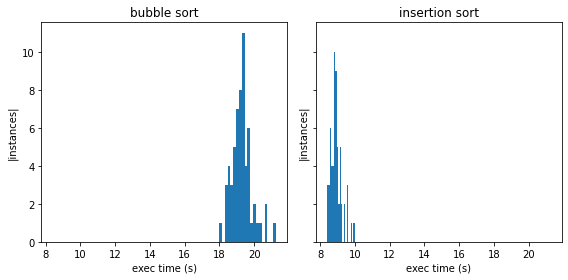

In [33]:
fig, axes = plt.subplots(1,2, sharex = True, sharey= True)
draw_hist(bubble_vals, "bubble sort", axes[0]) 
draw_hist(insert_vals, "insertion sort", axes[1]) 
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig('outputs/histogram_On2.pdf')

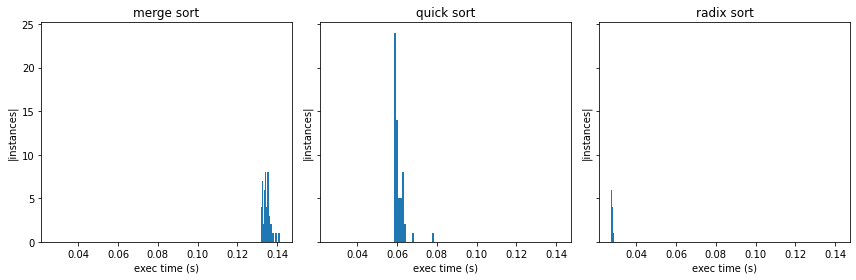

In [34]:
fig, axes = plt.subplots(1,3, sharex = True, sharey= True)
draw_hist(merge_vals, "merge sort", axes[0]) 
draw_hist(quick_vals, "quick sort", axes[1]) 
draw_hist(radix_vals, "radix sort", axes[2]) 
fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/histogram_Onlogn.pdf')

## Computing density functions

In [35]:
from scipy.stats import gaussian_kde
def density(values: list[float]):
    prob_density = gaussian_kde(values)
    prob_density.covariance_factor = lambda : .25
    prob_density._compute_covariance()
    return prob_density

In [36]:
def plot_density(f_density, name: str, scope: range, canvas):
    xs = list(scope)
    ys = f_density(xs)
    ys /= ys.sum() # need to normalize the data
    canvas.plot(xs, ys, '-', label=name)

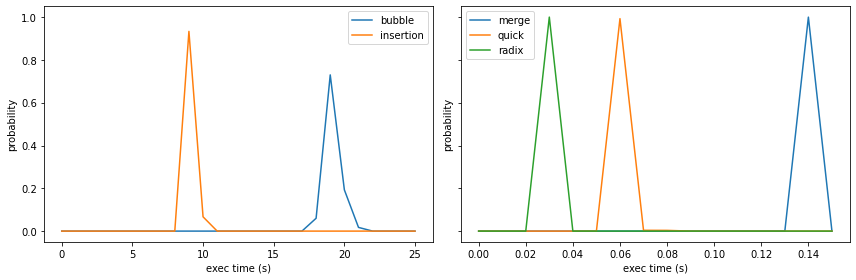

In [37]:
fig, ax = plt.subplots(1,2, sharey=True)

plot_density(density(bubble_vals), 'bubble', range(26), ax[0])
plot_density(density(insert_vals), 'insertion', range(26), ax[0])
ax[0].set(xlabel='exec time (s)', ylabel='probability')
ax[0].legend()

small_range = [x / 100 for x in range(0, 16)]
plot_density(density(merge_vals), 'merge', small_range, ax[1])
plot_density(density(quick_vals), 'quick', small_range, ax[1])
plot_density(density(radix_vals), 'radix', small_range, ax[1])
ax[1].set(xlabel='exec time (s)', ylabel='probability')
ax[1].legend()

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/density.pdf')

## Using box plots

In [38]:
def plot_box(values: list[float], names: str, canvas):
    canvas.boxplot(values, notch=True, labels=names)

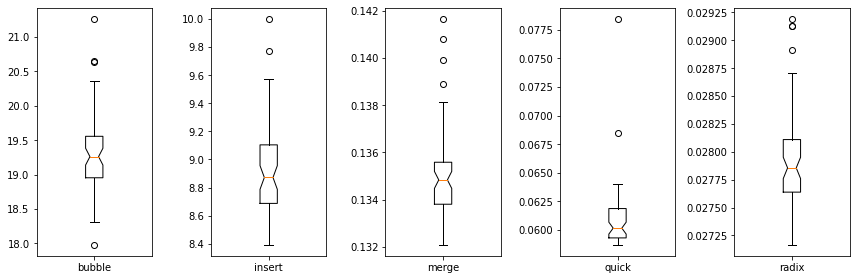

In [39]:
fig, ax = plt.subplots(1,5)

plot_box([bubble_vals],['bubble'], ax[0])
plot_box([insert_vals],['insert'], ax[1])
plot_box([merge_vals],['merge'], ax[2])
plot_box([quick_vals],['quick'], ax[3])
plot_box([radix_vals],['radix'], ax[4])

fig.set_size_inches(12,4)
fig.tight_layout()
fig.savefig('outputs/boxplot.pdf')